# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [47]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [125]:
# Import ".json" file for the Brazil

country_geo = pd.read_json(r'/Users/arturassada/Desktop/Brazilian E-Commerce/06 Side/custom.geo (4).json')

In [126]:
country_geo

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
5,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
6,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
7,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
8,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."
9,FeatureCollection,"{'type': 'Feature', 'properties': {'featurecla..."


In [127]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/arturassada/Desktop/Brazilian E-Commerce/06 Side/custom.geo (4).json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data:
    print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [128]:
print(json.dumps(data, indent=4))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [129]:
path = r'/Users/arturassada/Desktop/Brazilian E-Commerce'

In [130]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'data_general.csv'))

In [131]:
pd.set_option('display.max_columns', None)

In [132]:
df.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,review_id,review_score,review_comment_title,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff,1.0,credit_card,2.0,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,7b07bacd811c4117b742569b04ce3580,4.0,NaN,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,pet_shop,1.0,credit_card,3.0,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,furniture_decor,1.0,credit_card,5.0,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,f4028d019cb58564807486a6aaf33817,4.0,NaN,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,perfumery,1.0,credit_card,2.0,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,940144190dcba6351888cafa43f3a3a5,5.0,NaN,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,garden_tools,1.0,credit_card,3.0,218.04


In [133]:
df.shape

(115723, 35)

### 2. Data wrangling 

##### Query df for only neccessary columns for this exercise

In [134]:
#Query neccessary columns and condition for order_status as "delivered"

df1 = df[df['order_status'] == 'delivered'][['order_item_id','product_id','customer_state']]

In [135]:
df1

,order_item_id,product_id,customer_state
0,1,4244733e06e7ecb4970a6e2683c13e61,RJ
1,1,e5f2d52b802189ee658865ca93d83a8f,SP
2,1,c777355d18b72b67abbeef9df44fd0fd,MG
3,1,7634da152a4610f1595efa32f14722fc,SP
4,1,ac6c3623068f30de03045865e4e10089,SP
...,...,...,...
115718,1,4aa6014eceb682077f9dc4bffebc05b0,MA
115719,1,32e07fd915822b0765e448c4dd74c828,PR
115720,1,72a30483855e2eafc67aee5dc2560482,SP
115721,1,9c422a519119dcad7575db5af1ba540e,SP


### 3. Consistency Checks

#### Missing values check

In [136]:
#check for missing values -> no nulls
df1.isnull().sum()

order_item_id     0
product_id        0
customer_state    0
dtype: int64

#### Duplicates check

In [137]:
dups = df1.duplicated()

In [138]:
dups.shape

(115723,)

#### Extreme value check

<AxesSubplot:xlabel='order_item_id', ylabel='Count'>

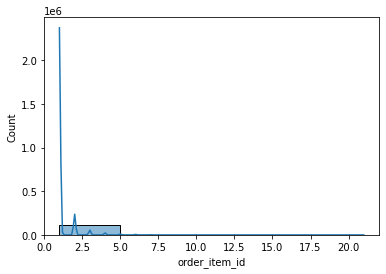

In [139]:
sns.histplot(df1['order_item_id'], bins=5, kde = True) # shows extreme values for 'order_item_id'

### 4. Data Wrangling - continued

In [159]:
# Create a subset

df2 = df1.groupby('customer_state')['order_item_id'].count()

In [160]:
df3 = df.groupby('customer_state').agg({'order_item_id': 'count'}).rename(columns={'order_item_id': 'product_count'})

In [161]:
df3 = df.groupby('customer_state').agg({'order_item_id': 'count'}).rename(columns={'order_item_id': 'product_count'}).reset_index()
df3 = df3.rename(columns={'customer_state': 'state'})
#df3 = df3.set_index('state')

In [162]:
df3.head(5)

,state,product_count
0,AC,94
1,AL,445
2,AM,170
3,AP,83
4,BA,3950


### 5
. Plotting a choropleth

In [163]:
df3.columns

Index(['state', 'product_count'], dtype='object')

In [164]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df3['product_count']
data_to_plot.head()

0      94
1     445
2     170
3      83
4    3950
Name: product_count, dtype: int64

In [165]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'product_count'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

ValueError: Cannot render objects with any missing geometries:                  type                                           features
0   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
1   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
2   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
3   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
4   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
5   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
6   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
7   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
8   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
9   FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
10  FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
11  FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
12  FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
13  FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...
14  FeatureCollection  {'type': 'Feature', 'properties': {'featurecla...

In [147]:
map.save('plot_data.html')